# Spacy basics

In this notebook we will cover:
- Loading the Language Library
- Building a Pipeline Object
- Using Tokens
- Parts-of-Speech Tagging
- Understanding Token Attributes

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

Let's get the text inside and parse it into tokens.

In [3]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

Iterating over tokens and getting `.text` attribute from it.

In [4]:
for token in doc:
    print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


POS or Part of Speech is referring to adverb, a verb, a noun etc.

In [5]:
for token in doc:
    print(token.text, token.pos)

Tesla 95
is 99
looking 99
at 84
buying 99
U.S. 95
startup 91
for 84
$ 98
6 92
million 92


Let's look at the name of the speech part by adding `pos_` instead of `pos`. It is smart enough to understand that 'million' is a number and '$' is a symbol.

In [6]:
for token in doc:
    print(token.text, token.pos_)

Tesla PROPN
is VERB
looking VERB
at ADP
buying VERB
U.S. PROPN
startup NOUN
for ADP
$ SYM
6 NUM
million NUM


Let's print the DEP which is referring to syntactic dependency.

In [7]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


Let's initiate pipeline. We see that the basic NLP pipeline contains of tagger, parser and ner (named entity recognizer).

In [8]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x215f290a7c8>),
 ('parser', <spacy.pipeline.DependencyParser at 0x215f28f1d68>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x215f290d348>)]

In [9]:
nlp.pipe_names

['tagger', 'parser', 'ner']

### Tokenization

We split up all the component parst such as words and punctuation into tokens.

In [10]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [11]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
n't ADV neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


We can add more spaces and it will become token

In [12]:
doc2 = nlp(u"Tesla isn't     looking into startups anymore.")

In [13]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
n't ADV neg
     SPACE 
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


We can use indexing to grab tokens individually.

In [14]:
doc2[0], doc2[0].pos_, doc2[0].dep_

(Tesla, 'PROPN', 'nsubj')

___
## Spans

Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [15]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [16]:
life_quote = doc3[16:30]

In [17]:
print(life_quote)

"Life is what happens to us while we are making other plans"


SpaCy understands that `life_quote` is a span object. Meaning it's a slice of a larger document.

In [18]:
type(life_quote)

spacy.tokens.span.Span

In [19]:
type(doc3)

spacy.tokens.doc.Doc

Let's perform segmentation. Spacy automatically understands that string contains of sentences.

In [20]:
doc4 = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [21]:
for sentence in doc4.sents:
    print(sentence)

This is the first sentence.
This is another sentence.
This is the last sentence.


Getting information whether the word is a start of a sentence.

In [22]:
doc4[6], doc4[6].is_sent_start

(This, True)

In [23]:
doc4[8], doc4[8].is_sent_start

(another, None)

# Tokenization

Toeknization is the process of breaking up the original text into component pieces (tokens).
This is initial step when we create our document object using spaCy.
- Notice that tokens are pieces of the original text
- We don't see any conversion to word stems or lemmase (base forms of words) and we haven't seen anything about oranizations/places/money etc. This will be named entity recognition.
___

- **Prefix**: Caracter(s) at the beginning
- **Suffix**: Caracter(s) at the end
- **Infix**: Caracter(s) in between
- **Exception**: Special-case rule to split a sting into several tokens or prevent a token form being split when punctuation rules applied

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [35]:
doc = nlp(mystring)

We're able to capture double quates, the `'re` and `L.A.` and we have an exclamation mark

In [36]:
for token in doc:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


Let's try out more complex string. We have a lot of punctuation, we have dot-tier and dots in the website.

In [37]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at https://www.oursite.com!")

In [39]:
for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
https://www.oursite.com
!


We see that `-` have assigned its own token. This happens because spaCy have it's own internal rules on what should be tokenized and what is not.

In [41]:
doc3 = nlp(u"A 5km NYC cab ride costs $10.30")

In [42]:
for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [43]:
doc4 = nlp(u"Let's visit St. Luis in the U.S. next year.")

In [44]:
for t in doc4:
    print(t)

Let
's
visit
St.
Luis
in
the
U.S.
next
year
.


Let's check how many tokens we have in the `doc4`

In [45]:
len(doc4)

11

We can also count vocab entry. Vocab objects contain a full library of items. 

In [46]:
doc4.vocab

The length of `vocab` highlights how many tokens we have in pre loaded library which is `en_core_web_sm`. Where `sm` stands for "small"

In [47]:
len(doc4.vocab)

57852

We can slice over tokens

In [48]:
doc5 = nlp(u"It is better to give than recieve.")

In [49]:
doc5[0]

It

In [50]:
doc5[2:5]

better to give

Tokens cannot be reassigned. Although document objects can be considered lists of tokens they do not support item re-assignment.

SpaCy can also understand named entities. Named entites add another layer of context. The language model that you load in at very top recognizes that certain words are organization names while others are locations. Named entities accessible through the `ents` property of a document object.

In [51]:
doc8 = nlp(u"Apple to build a Hong Kong factory for $6 million")

In [52]:
for token in doc8:
    print(token.text, end="  |  ")

Apple  |  to  |  build  |  a  |  Hong  |  Kong  |  factory  |  for  |  $  |  6  |  million  |  

As we may see spaCy understands that there's something special in words "Apple", "Hong Kong" and "$6 million". Those are named entities.

In [53]:
for entity in doc8.ents:
    print(entity)

Apple
Hong Kong
$6 million


In [54]:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print()

Apple
ORG

Hong Kong
GPE

$6 million
MONEY



In [57]:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print(str(spacy.explain(entity.label_)))
    print()

Apple
ORG
Companies, agencies, institutions, etc.

Hong Kong
GPE
Countries, cities, states

$6 million
MONEY
Monetary values, including unit



Similar to `ents` we have noun chunks which are another object property. Noun chunks are base noun phrases. Essentially flat phrases that have a noun as their head. You can think of a noun chung as a noun plus the words describing that particular noun.

In [61]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

Here we have 3 noun chunks: "Autonomous cars", "insurance liability" and "manufacturers".

In [62]:
for chunk in doc9.noun_chunks:
    print(chunk)

Autonomous cars
insurance liability
manufacturers


## Visualization with spaCy

`displacy` is a built-in visualizer.

In [63]:
from spacy import displacy

In [64]:
doc = nlp(u"Apple is going to build a U.K. factory for $6 million.")

In [67]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

We can also visualize entitiy recognizer.

In [68]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")

We can see highlighted date, org, cardinal, product and money.

In [70]:
displacy.render(doc, style='ent', jupyter=True)

In [72]:
doc = nlp(u"This is a sentence.")
displacy.serve(doc, style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [18/Dec/2023 21:08:22] "GET / HTTP/1.1" 200 3057
127.0.0.1 - - [18/Dec/2023 21:08:22] "GET /favicon.ico HTTP/1.1" 200 3057



    Shutting down server on port 5000.



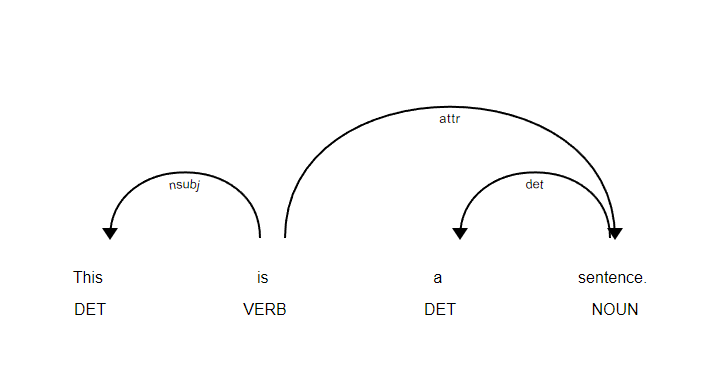

# Stemming

Often when searching text for a certain keyword, it helps if the search returns variation of the word. For instance, searching for "boat" might also return "boats" and "boating". Here "boat" would be the tem for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where more sophisticated process is required.

In fact, spaCy does not include a stemmer, opting instead to rely entirely on lemmatization. Because of that I will use `NLTK` and learn more about different Stemmers. Here I will use Porter Stemmer and the Snowball Stemmer.
___

One of the most common and effective-stemming tools is Porter's Algorithm developed by Martin Porter in 1980. The algorithm employs five phrases of word reduction, each with its own set of mapping rules.

In the first phase, simple suffix mapping rules are defined such as:

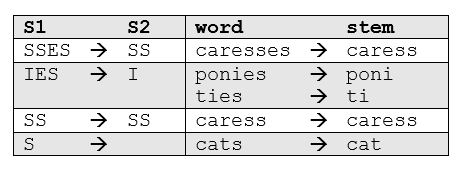

So you can see here that the ending of one SSES will get reduced to SS or for instance "caresses" gets reduced to "caress". Or IES gets reduced to I, for instance, "ponies" gets reduced to "poni".

From a given set of stemming rules only rule is applied, based on the longest suffix S1. Thus, "caresses" reduces to "caress" but not "cares" to avoid any confusion.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

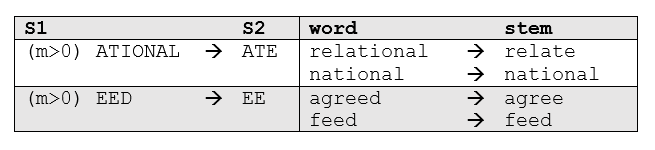

___

Snowball is the name of a stemming language also developed by Martin Porter. The algorithm used here is more accurately called "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed.

In [73]:
import nltk

C:\Users\egora\anaconda3\envs\nlp_course_env\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [74]:
from nltk.stem.porter import PorterStemmer

In [75]:
p_stremmer = PorterStemmer()

Let's create a list of words:

In [76]:
words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly']

They way to stem down these words is to pass them into stemmer.

In [78]:
for word in words:
    print(word + '----->' + p_stremmer.stem(word))

run----->run
runner----->runner
ran----->ran
runs----->run
easily----->easili
fairly----->fairli


In [79]:
from nltk.stem.snowball import SnowballStemmer

In [80]:
s_stemmer = SnowballStemmer(language='english')

In [82]:
words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly', 'fairness']

In [83]:
for word in words:
    print(word + '----->' + s_stemmer.stem(word))

run----->run
runner----->runner
ran----->ran
runs----->run
easily----->easili
fairly----->fair
fairness----->fair


**The idea is to stem down these words to some sort of root idea or root word.**

In [84]:
words = ['generous', 'generation', 'generously', 'generate']

In [85]:
for word in words:
    print(word + '----->' + s_stemmer.stem(word))

generous----->generous
generation----->generat
generously----->generous
generate----->generat


___
# Lemmatization

In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of "was" is "be" and the lemma of "mice" is "mouse". Futher, the lemma of "meeting" might be "meet" or "meeting" depending on its use in a sentence.

Lemmatization is typically seen as much more informative than simple stemming, which is why spaCy has opted to only have Lemmatization available instead of Stemming. Lemmatization looks at surrounding text to determine a given word's part of speech, it doesn't categorize phrases. 

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

Let's create a doc object which is consist of different forms of `run` which is `running`, `run` and `ran`.

In [3]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

Here we will see original word as a token, the part of speech, number which points to a specific lemma inside the library (hash), `lemma_` is an actual lemma.

In [6]:
for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 VERB 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 ADP 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 ADP 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


So for **`run`** and all forms of this words we see the same hash code which refers to the same lemma.

Let's use a function for better displaying of this information since because of the word length and hash codes it looks a bit off.

In [14]:
def show_lemmas(text):
    for token in text:
        print(f"{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}")

In [15]:
doc2 = nlp(u"I saw ten mice today!")

In [16]:
show_lemmas(doc2)

I            PRON   561228191312463089     -PRON-
saw          VERB   11925638236994514241   see
ten          NUM    7970704286052693043    ten
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


___
# Stop words

Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these stop words, and they can be filtered from the text to be processed. SpaCy holds a built-in list of some 305 English stop words.

In [17]:
import spacy

In [18]:
nlp = spacy.load('en_core_web_sm')

Here's the set of all stop words that built into spaCy

In [19]:
print(nlp.Defaults.stop_words)

{'i', 'on', 'and', 'not', 'becomes', 'everywhere', 'thence', 'move', 'my', 'whatever', 'its', 'more', 'off', 'into', 'thereafter', 'them', 'now', 'does', 'yours', 'under', 'twenty', 'nevertheless', 'besides', 'mine', 'take', 'give', 'whereby', 'afterwards', 'keep', 'something', 'among', 'whom', 'five', 'out', 'bottom', 'top', 'hers', 'thru', 'yourself', 'few', 'is', 'serious', 'eight', 'two', 'we', 'see', 'are', 'while', 'it', 'elsewhere', 'across', 'formerly', 'anyway', 'might', 'here', 'before', 'behind', 'name', 'others', 'hereby', 'part', 'seemed', 'seems', 'for', 'sometimes', 'anyone', 'beyond', 'there', 'those', 'when', 'whither', 'by', 'sixty', 'without', 'unless', 'has', 'thereby', 'whoever', 'hence', 'along', 'why', 'except', 'still', 'anyhow', 'indeed', 'everything', 'own', 'around', 'how', 'perhaps', 'beforehand', 'however', 'last', 'via', 'rather', 'whose', 'wherever', 'such', 'make', 'some', 'although', 'noone', 'would', 'yourselves', 'at', 'below', 'up', 'first', 'only', 

In [20]:
len(nlp.Defaults.stop_words)

305

We can check if the word is a stop word by simply calling NLP vocab.

In [22]:
nlp.vocab['is'].is_stop

True

In [23]:
nlp.vocab['mystery'].is_stop

False

Let's imagine we're dealing with unique dataset where acronym "btw" is used a lot and we want to add that to stop words.

In [24]:
nlp.Defaults.stop_words.add('btw')

In [26]:
nlp.vocab['btw'].is_stop = True

Sop we see that length of `nlp.Defaults.stop_words` is increased by 1 and how it is 306.

In [27]:
len(nlp.Defaults.stop_words)

306

In [28]:
nlp.vocab['btw'].is_stop

True

If there's a situation where you need ot remove a stop word. For instance there's a word that you want to accout for example "via", "four" or "beyond".

In [29]:
nlp.Defaults.stop_words.remove('beyond')

In [30]:
nlp.vocab['beyond'].is_stop = False

In [31]:
nlp.vocab['beyond'].is_stop

False

___
# Vocabulary and Matching

So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas. In this part we will identify and label specific phrases that match patterns we can define ourselves.

We can think of this as a powerful version of Regular Expression where we acutally take parts of speech into account for our pattern search.

In [32]:
import spacy

In [33]:
nlp = spacy.load('en_core_web_sm')

Rule Based Matching: spaCy offgers a rule matching tool called `Matcher` it allows to bui9ld a library of token patterns then match those patterns against a `doc` object to returna a list of found matches. A very similar idea to regular expressions but we can think of this as a kind of more powerful version of that. And it is possible to match on any part of token, including text and annotations. We can add multiple patterns to the same matcher.

In [54]:
from spacy.matcher import Matcher

Here the `matcher` is an object that pairs to the current vocab object.

In [55]:
matcher = Matcher(nlp.vocab)

The way it works is that you have a list and you add dictionaries to this list.

In [56]:
# SolarPower

pattern1 = [{'LOWER':'solarpower'}]

# Solar-power
pattern2 = [{'LOWER':'solar'}, {'IS_PUNCT':True}, {'LOWER': 'power'}]

# Solar power
pattern3 = [{'LOWER':'solar'}, {'LOWER': 'power'}]

In [57]:
matcher.add('SolarPower', None, pattern1, pattern2, pattern3)

In [58]:
doc = nlp(u"The Solar Power industry continues to grow a solarpower increases. Solar-Power is amazing.")

And to find matches we simply take the matcher as pass in a document object

In [59]:
found_matches = matcher(doc)

This will return tuple with 3 pieces of information. $1st$ is the string id for a particular match and then it indicates a start and a stop.

In [60]:
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 8, 9), (8656102463236116519, 11, 14)]


In [61]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get striong representation
    span = doc[start:end]                   # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 8 9 solarpower
8656102463236116519 SolarPower 11 14 Solar-Power


It is also possible to remove unwanted patterns.

In [45]:
matcher.remove('SolarPower')

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>

In [48]:
# solarpoer or SolarPower
pattern1 = [{'LOWER':'solarpower'}]

# solar* (for ex. solar--, solar__... power)
pattern2 = [{'LOWER':'solar'}, {'IS_PUNCT':True, 'OP':'*'}, {'LOWER':'power'}]

In [49]:
matcher.add('SolarPower', None, pattern1, pattern2)

In [50]:
doc2 = nlp(u"Solar--power is solarpower yay!")

In [51]:
found_matches = matcher(doc2)

In [53]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get striong representation
    span = doc2[start:end]                   # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 0 3 Solar--power
8656102463236116519 SolarPower 4 5 solarpower


___

In alternative and often more efficient method is to actually match on terminology list.

In [62]:
from spacy.matcher import PhraseMatcher

In [63]:
matcher = PhraseMatcher(nlp.vocab)

In [64]:
with open('reaganomics.txt') as f:
    doc3 = nlp(f.read())

In [65]:
phrase_lis = ['voodo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

In [66]:
phrase_patters = [nlp(text) for text in phrase_lis]

In [67]:
print(phrase_patters)

[voodo economics, supply-side economics, trickle-down economics, free-market economics]


In [68]:
type(phrase_patters[0])

spacy.tokens.doc.Doc

In [69]:
matcher.add('EconMatcher', None, *phrase_patters)

In [70]:
found_matches = matcher(doc3)

In [71]:
found_matches

[(3680293220734633682, 41, 45),
 (3680293220734633682, 49, 53),
 (3680293220734633682, 61, 65),
 (3680293220734633682, 673, 677),
 (3680293220734633682, 2985, 2989)]

In [72]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get striong representation
    span = doc3[start:end]                   # get the matched span
    print(match_id, string_id, start, end, span.text)

3680293220734633682 EconMatcher 41 45 supply-side economics
3680293220734633682 EconMatcher 49 53 trickle-down economics
3680293220734633682 EconMatcher 61 65 free-market economics
3680293220734633682 EconMatcher 673 677 supply-side economics
3680293220734633682 EconMatcher 2985 2989 trickle-down economics


In [73]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get striong representation
    span = doc3[start-5:end+5]                   # get the matched span
    print(match_id, string_id, start, end, span.text)

3680293220734633682 EconMatcher 41 45 policies are commonly associated with supply-side economics, referred to as trickle
3680293220734633682 EconMatcher 49 53 economics, referred to as trickle-down economics or voodoo economics by political
3680293220734633682 EconMatcher 61 65 by political opponents, and free-market economics by political advocates.


3680293220734633682 EconMatcher 673 677 attracted a following from the supply-side economics movement, which formed in
3680293220734633682 EconMatcher 2985 2989 became widely known as "trickle-down economics", due to the
